In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes",
    "something is amazing",
]

In [3]:
v=TfidfVectorizer()
transformed_output=v.fit_transform(corpus)
print(v.vocabulary_)

{'thor': 27, 'eating': 11, 'pizza': 23, 'loki': 18, 'is': 17, 'ironman': 16, 'ate': 8, 'already': 0, 'apple': 6, 'announcing': 5, 'new': 21, 'iphone': 15, 'tomorrow': 28, 'tesla': 26, 'model': 20, 'google': 13, 'pixel': 22, 'microsoft': 19, 'surface': 25, 'amazon': 3, 'eco': 12, 'dot': 10, 'am': 1, 'biryani': 9, 'and': 4, 'you': 29, 'are': 7, 'grapes': 14, 'something': 24, 'amazing': 2}


In [4]:
v.get_feature_names_out()

array(['already', 'am', 'amazing', 'amazon', 'and', 'announcing', 'apple',
       'are', 'ate', 'biryani', 'dot', 'eating', 'eco', 'google',
       'grapes', 'iphone', 'ironman', 'is', 'loki', 'microsoft', 'model',
       'new', 'pixel', 'pizza', 'something', 'surface', 'tesla', 'thor',
       'tomorrow', 'you'], dtype=object)

In [5]:
all_feature_names = v.get_feature_names_out()

In [6]:
for word in all_feature_names:
    
    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)
    
    #get the score
    idf_score = v.idf_[indx]
    
    print(f"{word} : {idf_score}")

already : 2.504077396776274
am : 2.504077396776274
amazing : 2.504077396776274
amazon : 2.504077396776274
and : 2.504077396776274
announcing : 1.4054651081081644
apple : 2.504077396776274
are : 2.504077396776274
ate : 2.504077396776274
biryani : 2.504077396776274
dot : 2.504077396776274
eating : 2.09861228866811
eco : 2.504077396776274
google : 2.504077396776274
grapes : 2.504077396776274
iphone : 2.504077396776274
ironman : 2.504077396776274
is : 1.1177830356563834
loki : 2.504077396776274
microsoft : 2.504077396776274
model : 2.504077396776274
new : 1.4054651081081644
pixel : 2.504077396776274
pizza : 2.504077396776274
something : 2.504077396776274
surface : 2.504077396776274
tesla : 2.504077396776274
thor : 2.504077396776274
tomorrow : 1.4054651081081644
you : 2.504077396776274


In [7]:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [8]:
#let's print the transformed output from tf-idf
transformed_output.toarray()[:2]

array([[0.24247317, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.24247317, 0.        ,
        0.        , 0.40642288, 0.        , 0.        , 0.        ,
        0.        , 0.24247317, 0.10823643, 0.24247317, 0.        ,
        0.        , 0.        , 0.        , 0.7274195 , 0.        ,
        0.        , 0.        , 0.24247317, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.31652498, 0.5639436 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5639436 , 0.        , 0.25173606, 0.        , 0.        ,
        0.        , 0.31652498, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.31652498, 0.        ]])

In [9]:
import pandas as pd

#read the data into a pandas dataframe
df = pd.read_csv("ecommerceDataset.csv",header=None)
df.columns = ['label', 'Text'] 
print(df.shape)
df.head(5)

(50425, 2)


,label,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [10]:
#check the distribution of labels 
df['label'].value_counts()

label
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

In [11]:
df['label_num'] = df['label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

#checking the results 
df.head(5)

,label,Text,label_num
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,0
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0
4,Household,Incredible Gifts India Wooden Happy Birthday U...,0


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [13]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (40340,)
Shape of X_test:  (10085,)


In [14]:
y_train.value_counts()

label_num
0    15450
1     9456
2     8497
3     6937
Name: count, dtype: int64

In [15]:
y_test.value_counts()

label_num
0    3863
1    2364
2    2124
3    1734
Name: count, dtype: int64

In [16]:
X_train = X_train.fillna('')
X_test = X_test.fillna('')

### KNN :

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


#1. create a pipeline object

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3863
           1       0.97      0.95      0.96      2364
           2       0.97      0.93      0.95      2124
           3       0.96      0.98      0.97      1734

    accuracy                           0.96     10085
   macro avg       0.96      0.96      0.96     10085
weighted avg       0.96      0.96      0.96     10085



In [24]:
X_test[:5]

41536    Seagate 4TB Backup Plus Hub USB 3.0 Desktop 3....
9671     Sunflame GT Pride 2 Burner Gas Stove, Black St...
49630    iVoltaa Next Gen Compact Wired Selfie Stick fo...
33658    TWO DOTS Air Bra for Girls and Women Combo of ...
19317    The Secret of Secrets: The Secrets of the Gold...
Name: Text, dtype: object

In [25]:
y_test[:5]

41536    2
9671     0
49630    2
33658    3
19317    1
Name: label_num, dtype: int64

In [26]:
y_pred[:5]

array([2, 0, 2, 3, 1], dtype=int64)

### MULTINOMIALNB :

In [27]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3863
           1       0.98      0.92      0.95      2364
           2       0.97      0.90      0.93      2124
           3       0.98      0.93      0.96      1734

    accuracy                           0.94     10085
   macro avg       0.96      0.93      0.94     10085
weighted avg       0.94      0.94      0.94     10085



### RandomForest :

In [28]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3863
           1       0.98      0.97      0.98      2364
           2       0.98      0.94      0.96      2124
           3       0.97      0.97      0.97      1734

    accuracy                           0.97     10085
   macro avg       0.97      0.96      0.97     10085
weighted avg       0.97      0.97      0.97     10085



### With text Preprocessing :

In [20]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    if isinstance(text, float):  # Vérifier si le texte est un float (par exemple NaN)
        return ""
    
    # Supprimer les mots vides et lemmatiser le texte
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)


In [21]:
df['preprocessed_txt'] = df['Text'].apply(preprocess) 

In [22]:
df.head()

,label,Text,label_num,preprocessed_txt
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,0,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0,SAF Floral Framed Painting Wood 30 inch x 10 i...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0,saf uv texture Modern Art Print Framed Paintin...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0,SAF Flower Print Framed Painting Synthetic 13....
4,Household,Incredible Gifts India Wooden Happy Birthday U...,0,incredible Gifts India Wooden Happy Birthday U...


In [23]:
df.Text[0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal blis

In [24]:
df.preprocessed_txt[0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints 8.7 x 8.7 inch set 4 Painting synthetic frame uv texture print give multi effect attract special series painting make wall beautiful give royal touch painting ready hang proud possess unique painting niche apart use modern efficient print technology print ink precision epson roland hp printer innovative hd printing technique result durable spectacular look print high lifetime print solely notch 100 ink achieve brilliant true colour high level uv resistance print retain beautiful colour year add colour style live space digitally print painting pleasure eternal bliss.so bring home elegant print lushe rich color make sheer elegance friend family.it treasure forever lucky recipient liven place intriguing painting high definition hd graphic digital print home office room'

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3863
           1       0.98      0.97      0.98      2364
           2       0.98      0.95      0.97      2124
           3       0.99      0.97      0.98      1734

    accuracy                           0.97     10085
   macro avg       0.98      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3812,   16,   21,   14],
       [  45, 2303,    9,    7],
       [  90,   12, 2019,    3],
       [  34,    9,    4, 1687]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

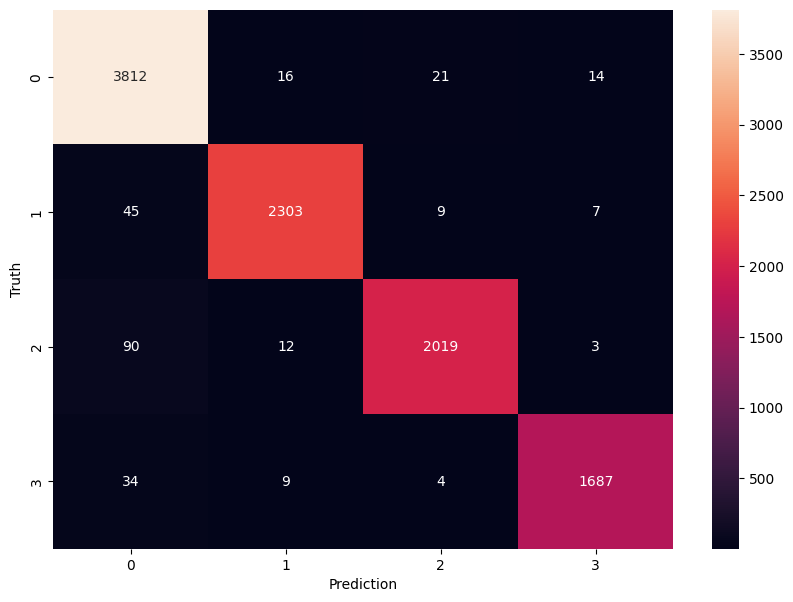

In [30]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')